In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd
import seaborn as sns

In [2]:
#load all data and filter errors
param = pd.read_csv('env_param.csv')
#param = param[param['Action_total'] < 5000]
#param = param[param['RMSE'] < 5]
param = param[param['Energy'] < 1000]
param = param[param['Exceedance'] < 1000]
param = param[param['Energy_online'] < 1000]
param = param[param['Exceedance_online'] < 1000]
param['Energy'] = param['Energy']#/90.
param['Exceedance'] = param['Exceedance']#/90.
param['Penalty'] = param['Penalty']#/90.
param['Energy_online'] = param['Energy_online']#/90.
param['Exceedance_online'] = param['Exceedance_online']#/90.
param['Penalty_online'] = param['Penalty_online']#/90.
param

,C_env,C_air,R_rc,R_oe,R_er,RMSE,Action_total,Energy,Penalty,Exceedance,Action_total_online,Energy_online,Penalty_online,Exceedance_online
0,2861021.50,273879.3270,0.005436,0.025090,0.004946,0.529760,2076.839974,346.38177,234.0,107.878978,2817.202881,521.874207,38.0,27.188744
1,6334976.69,402955.8920,0.014314,0.057298,0.001679,1.256657,3229.413277,554.05225,157.5,71.167878,3015.134033,536.947693,21.0,9.280811
5,1225594.14,128379.3790,0.005857,0.023282,0.004154,0.715745,2288.655297,396.70557,268.5,93.900873,2681.819336,522.474792,43.0,30.362962
7,6462240.32,438527.5910,0.007809,0.041448,0.007473,1.247494,1915.321234,322.07944,878.0,559.528548,3234.310791,585.058411,45.5,41.028662
8,5876427.79,528586.8020,0.009662,0.053773,0.001243,1.544007,3200.333555,547.92084,214.5,62.752684,2993.178711,522.335388,28.0,7.915114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4503402.93,66324.0754,0.008905,0.017008,0.004797,2.087332,2000.589746,492.25504,430.0,132.035268,2631.529053,504.082184,46.5,18.889253
196,902221.88,183577.3920,0.003947,0.016177,0.001565,0.888829,3731.203076,750.49260,464.0,240.186340,3221.480957,853.398315,208.5,199.916416
197,1870925.58,683740.3130,0.009200,0.036165,0.004575,0.830661,2220.452169,375.73904,323.0,63.418974,3031.139160,521.108704,20.0,5.323377
198,2067278.19,658827.3840,0.002630,0.046145,0.003024,2.152762,1964.402290,331.35077,582.5,483.755796,3242.255859,574.989807,48.0,18.960209


C:\Users\liu1052\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0, 0.5, 'Normalized Frequency')

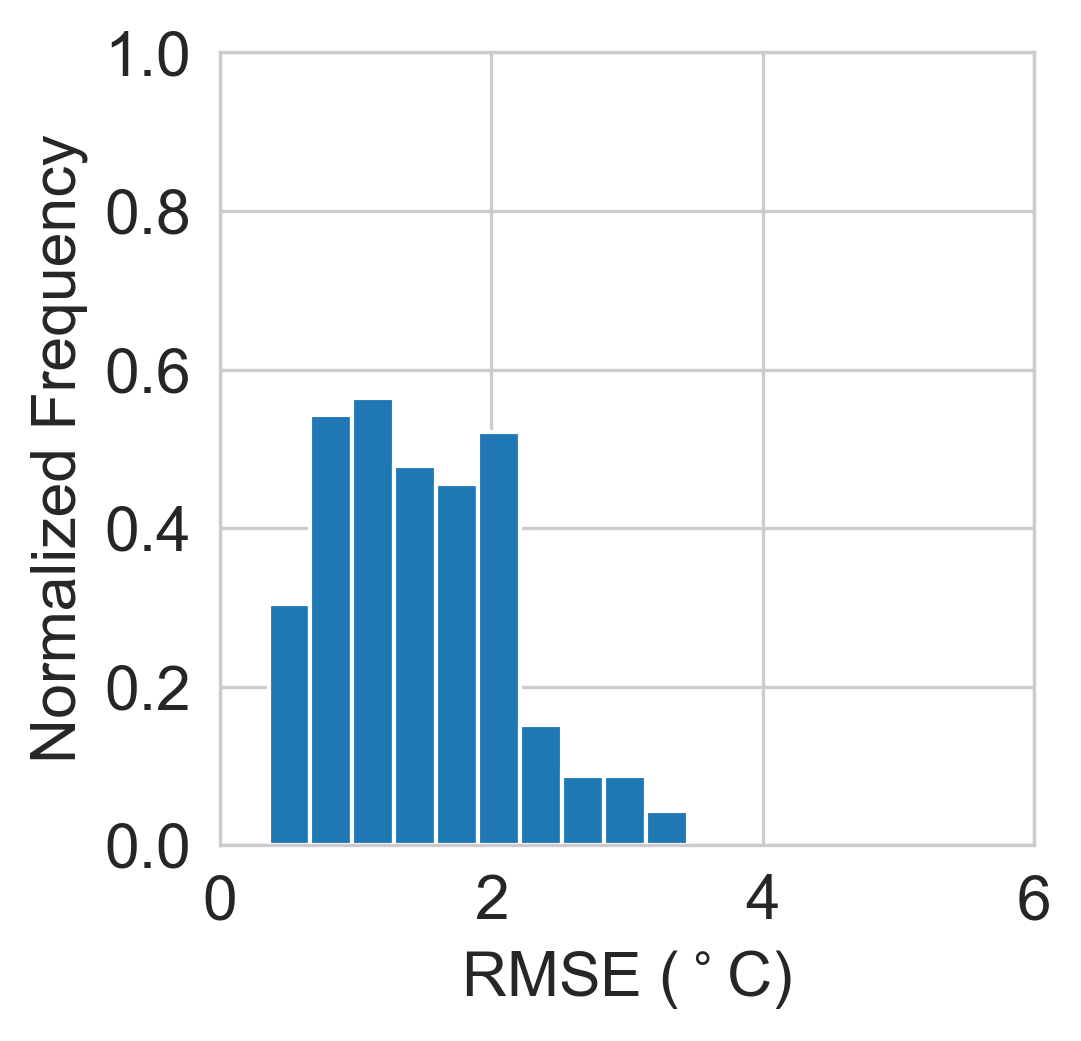

In [3]:
# Histogram of RMSE

sns.set_style("whitegrid")
font = 15
matplotlib.rc('xtick', labelsize = font) 
matplotlib.rc('ytick', labelsize = font)
plt.figure(figsize=(3.5, 3.5), dpi = 300)
plt.hist(param['RMSE'], normed=1)
plt.xlim([0, 6])
plt.ylim([0, 1])
plt.xlabel('RMSE ($^\circ$C)', fontsize = font)
plt.ylabel('Normalized Frequency', fontsize = font)
#plt.title('Distribution of Indoor Air Temperature \nPrediction RMSE for Sampled Environments', fontsize = font)


In [4]:
# Root mean squared error on T_air prediction < 0.5

param_1 = param[param['RMSE'] < 0.5]
param_1

RMSE_1 = param_1['RMSE']
Action_total_1 = param_1['Action_total']
Energy_1 = param_1['Energy']
Penalty_1 = param_1['Penalty']
Exceedance_1 = param_1['Exceedance']

Energy_1_online = param_1['Energy_online']
Penalty_1_online = param_1['Penalty_online']
Exceedance_1_online = param_1['Exceedance_online']

In [5]:
# Root mean squared error on T_air prediction 0.5 to 1

param_2 = param[(param['RMSE'] >= 0.5) & (param['RMSE'] < 1)]
param_2

RMSE_2 = param_2['RMSE']
Action_total_2 = param_2['Action_total']
Energy_2 = param_2['Energy']
Penalty_2 = param_2['Penalty']
Exceedance_2 = param_2['Exceedance']

Energy_2_online = param_2['Energy_online']
Penalty_2_online = param_2['Penalty_online']
Exceedance_2_online = param_2['Exceedance_online']

In [6]:
# Root mean squared error on T_air prediction 1 to 1.5

param_3 = param[(param['RMSE'] >= 1) & (param['RMSE'] < 1.5)]
param_3

RMSE_3 = param_3['RMSE']
Action_total_3 = param_3['Action_total']
Energy_3 = param_3['Energy']
Penalty_3 = param_3['Penalty']
Exceedance_3 = param_3['Exceedance']

Energy_3_online = param_3['Energy_online']
Penalty_3_online = param_3['Penalty_online']
Exceedance_3_online = param_3['Exceedance_online']

In [7]:
# Root mean squared error on T_air prediction 1.5 to 2

param_4 = param[(param['RMSE'] >= 1.5) & (param['RMSE'] < 2)]
param_4

RMSE_4 = param_4['RMSE']
Action_total_4 = param_4['Action_total']
Energy_4 = param_4['Energy']
Penalty_4 = param_4['Penalty']
Exceedance_4 = param_4['Exceedance']

Energy_4_online = param_4['Energy_online']
Penalty_4_online = param_4['Penalty_online']
Exceedance_4_online = param_4['Exceedance_online']

In [8]:
# Root mean squared error on T_air prediction > 2

param_5 = param[(param['RMSE'] >= 2)]
param_5

RMSE_5 = param_5['RMSE']
Action_total_5 = param_5['Action_total']
Energy_5 = param_5['Energy']
Penalty_5 = param_5['Penalty']
Exceedance_5 = param_5['Exceedance']

Energy_5_online = param_5['Energy_online']
Penalty_5_online = param_5['Penalty_online']
Exceedance_5_online = param_5['Exceedance_online']

In [17]:
# Root mean squared error on T_air prediction >= 1

param_6 = param[(param['RMSE'] < 1)]
param_6

RMSE_6 = param_6['RMSE']
Action_total_6 = param_6['Action_total']
Energy_6 = param_6['Energy']
Penalty_6 = param_6['Penalty']
Exceedance_6 = param_6['Exceedance']

Energy_6_online = param_6['Energy_online']
Penalty_6_online = param_6['Penalty_online']
Exceedance_6_online = param_6['Exceedance_online']

In [18]:
# Root mean squared error on T_air prediction <1

param_7 = param[(param['RMSE'] >= 1)]
param_7

RMSE_7 = param_7['RMSE']
Action_total_7 = param_7['Action_total']
Energy_7 = param_7['Energy']
Penalty_7 = param_7['Penalty']
Exceedance_7 = param_7['Exceedance']

Energy_7_online = param_7['Energy_online']
Penalty_7_online = param_7['Penalty_online']
Exceedance_7_online = param_7['Exceedance_online']

In [33]:
# Root mean squared error on T_air prediction <1

param_8 = param[(param['RMSE'] >= 1.5)]
param_8

RMSE_8 = param_8['RMSE']
Action_total_8 = param_8['Action_total']
Energy_8 = param_8['Energy']
Penalty_8 = param_8['Penalty']
Exceedance_8 = param_8['Exceedance']

Energy_8_online = param_8['Energy_online']
Penalty_8_online = param_8['Penalty_online']
Exceedance_8_online = param_8['Exceedance_online']

Text(0.5, 1.02, 'Temperature Exceedance vs. Energy Consumption (without online update)')

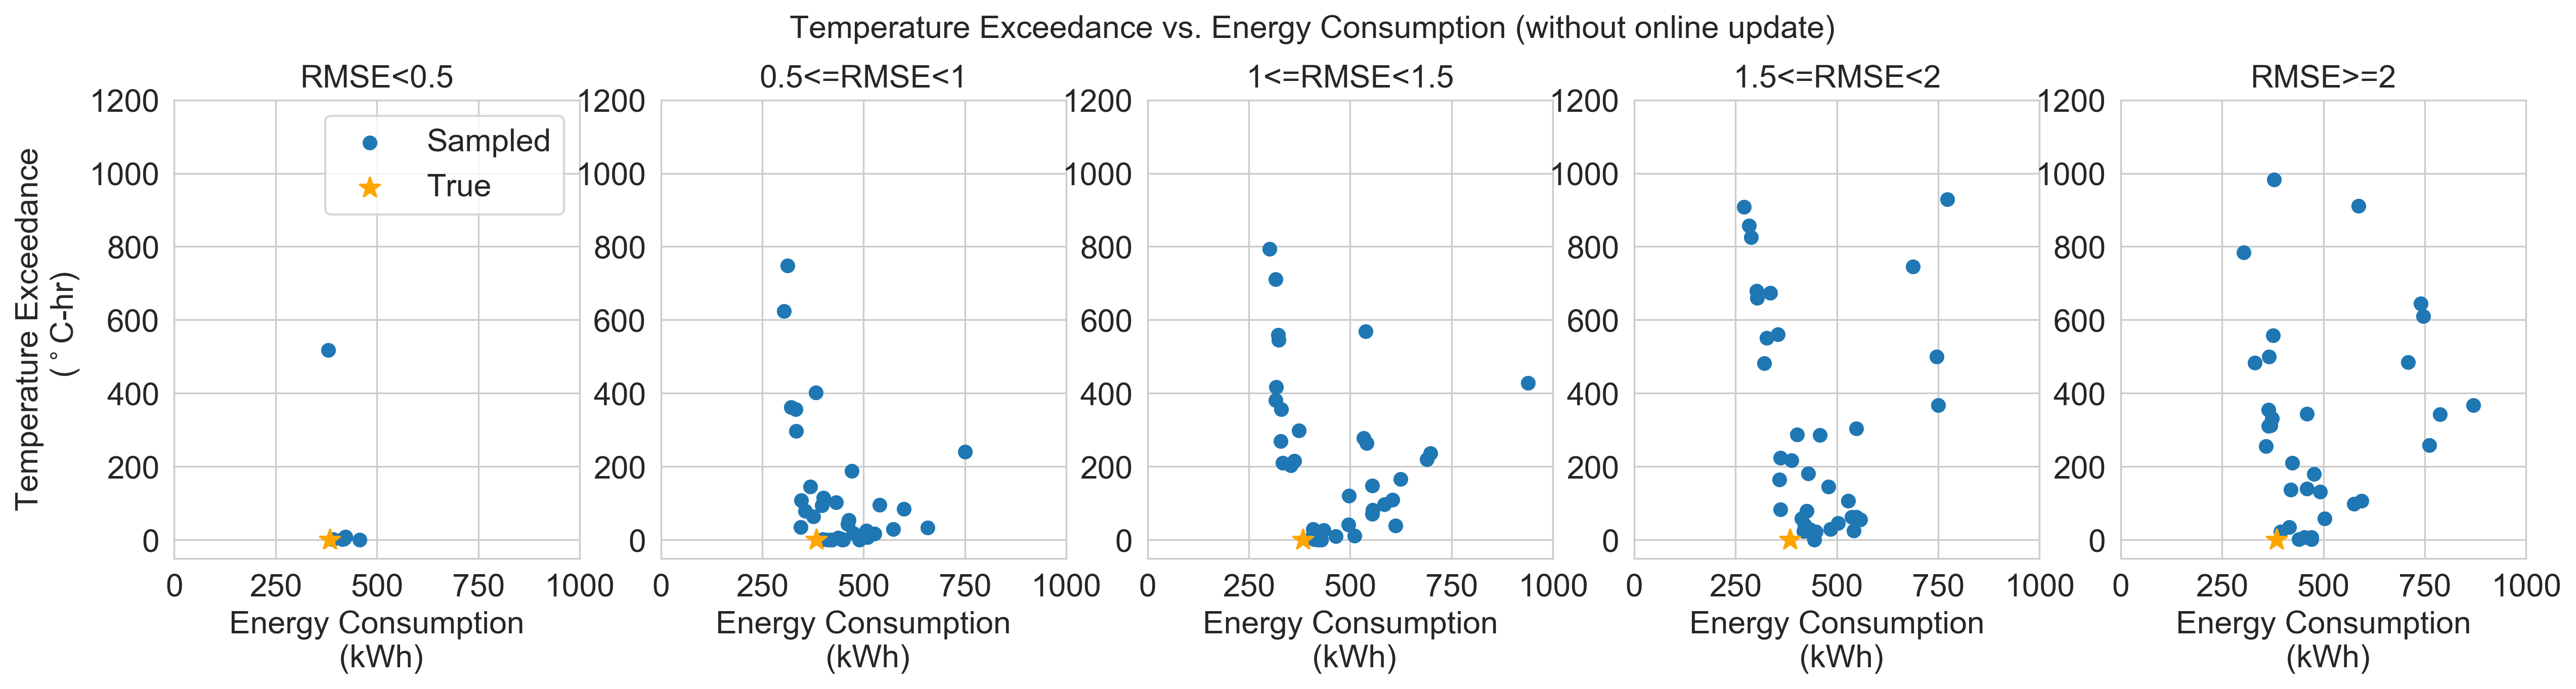

In [9]:
# Plot Energy Use vs Temperature Exceedance

sns.set_style("whitegrid")
font = 15
matplotlib.rc('xtick', labelsize = font) 
matplotlib.rc('ytick', labelsize = font)
    
fig, axs = plt.subplots(1, 5, figsize=(20, 4), dpi = 300)
axs[0].scatter(Energy_1, Exceedance_1, label = 'Sampled')
axs[0].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[1].scatter(Energy_2, Exceedance_2, label = 'Sampled')
axs[1].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[2].scatter(Energy_3, Exceedance_3, label = 'Sampled')
axs[2].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[3].scatter(Energy_4, Exceedance_4, label = 'Sampled')
axs[3].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[4].scatter(Energy_5, Exceedance_5, label = 'Sampled')
axs[4].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
    
axs[0].set_ylim([-50, 1200])
axs[1].set_ylim([-50, 1200])    
axs[2].set_ylim([-50, 1200])
axs[3].set_ylim([-50, 1200])
axs[4].set_ylim([-50, 1200]) 

axs[0].set_xlim([0, 1000])
axs[1].set_xlim([0, 1000])    
axs[2].set_xlim([0, 1000])
axs[3].set_xlim([0, 1000])
axs[4].set_xlim([0, 1000]) 

axs[0].set_ylabel("Temperature Exceedance\n ($^\circ$C-hr)", fontsize = font)
#axs[1].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[2].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[3].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[4].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
    
axs[0].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[1].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[2].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[3].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[4].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)

axs[0].set_title("RMSE<0.5", fontsize = font)
axs[1].set_title("0.5<=RMSE<1", fontsize = font)
axs[2].set_title("1<=RMSE<1.5", fontsize = font)
axs[3].set_title("1.5<=RMSE<2", fontsize = font)
axs[4].set_title("RMSE>=2", fontsize = font)

axs[0].legend(loc = 'best', fontsize = font)

fig.suptitle("Temperature Exceedance vs. Energy Consumption (without online update)", fontsize = font , y = 1.02)

Text(0.5, 1.02, 'Temperature Exceedance vs. Energy Consumption (3-month online update)')

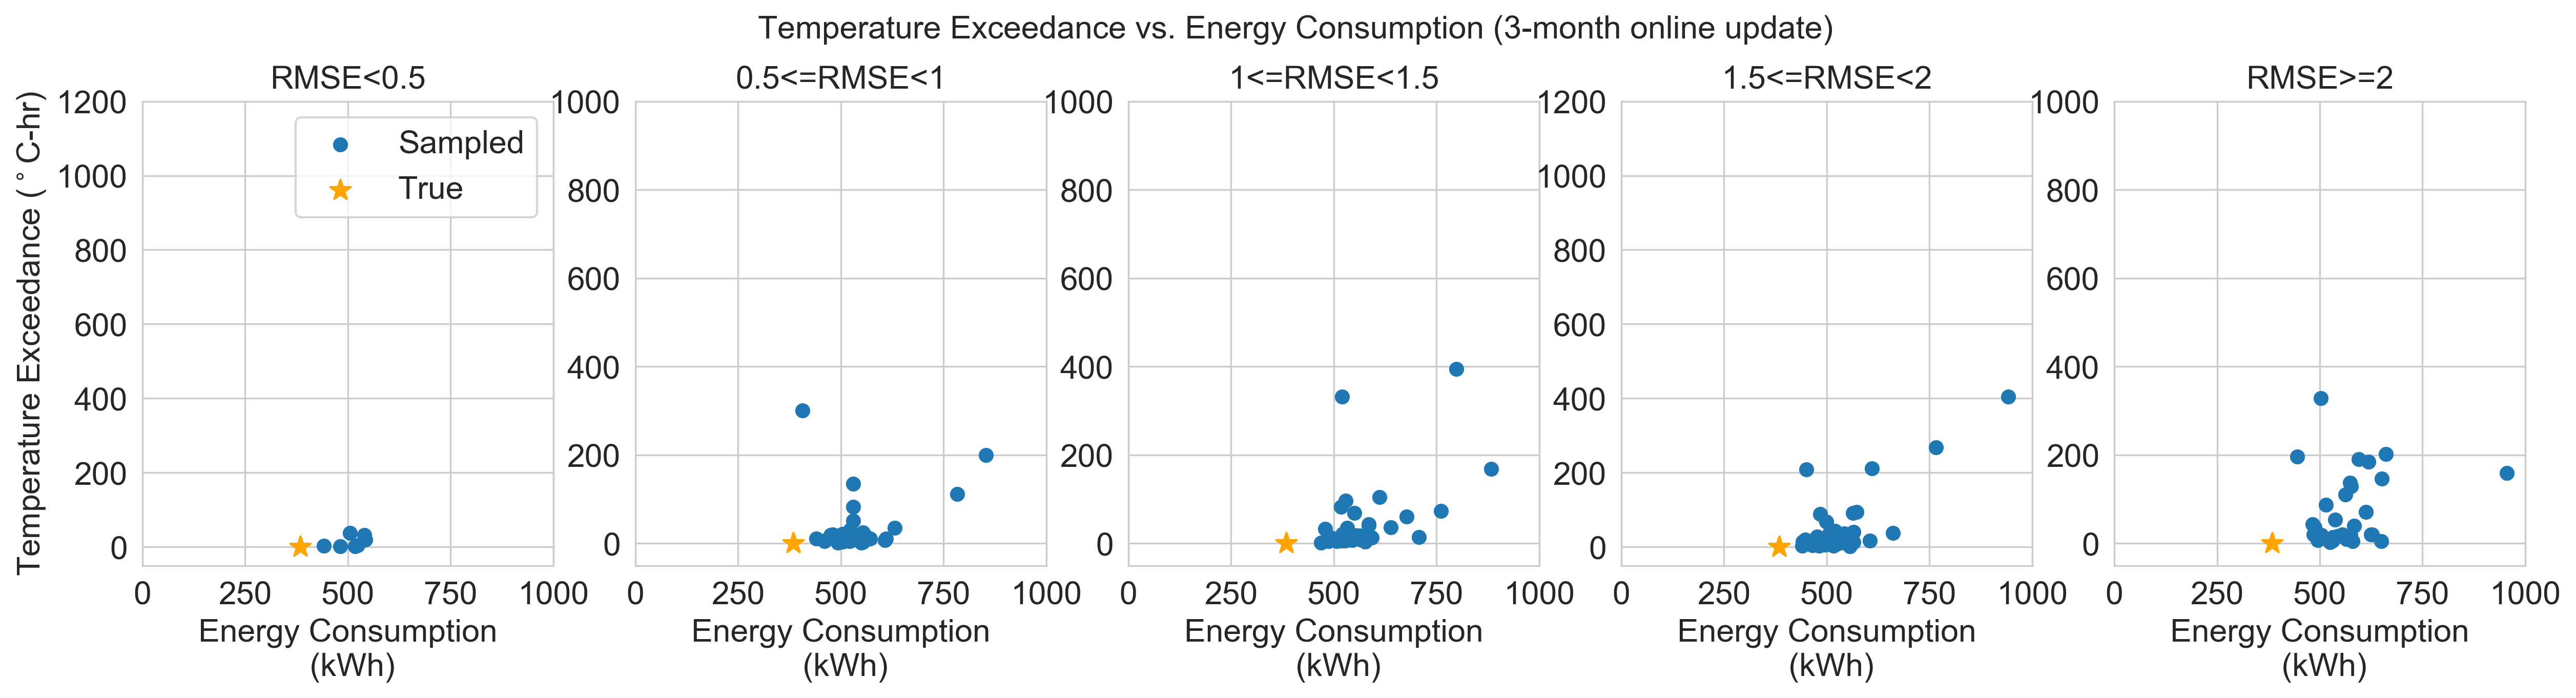

In [10]:
# Plot Energy Use vs Temperature Exceedance

sns.set_style("whitegrid")
font = 15
matplotlib.rc('xtick', labelsize = font) 
matplotlib.rc('ytick', labelsize = font)
    
fig, axs = plt.subplots(1, 5, figsize=(20, 4), dpi = 300)
axs[0].scatter(Energy_1_online, Exceedance_1_online, label = 'Sampled')
axs[0].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[1].scatter(Energy_2_online, Exceedance_2_online, label = 'Sampled')
axs[1].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[2].scatter(Energy_3_online, Exceedance_3_online, label = 'Sampled')
axs[2].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[3].scatter(Energy_4_online, Exceedance_4_online, label = 'Sampled')
axs[3].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[4].scatter(Energy_5_online, Exceedance_5_online, label = 'Sampled')
axs[4].scatter(384, 0, s= 100, color = 'orange', marker = '*', label = 'True')
    
axs[0].set_ylim([-50, 1200])
axs[1].set_ylim([-50, 1000])    
axs[2].set_ylim([-50, 1000])
axs[3].set_ylim([-50, 1200])
axs[4].set_ylim([-50, 1000]) 

axs[0].set_xlim([0, 1000])
axs[1].set_xlim([0, 1000])    
axs[2].set_xlim([0, 1000])
axs[3].set_xlim([0, 1000])
axs[4].set_xlim([0, 1000]) 

axs[0].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[1].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[2].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[3].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[4].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
    
axs[0].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[1].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[2].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[3].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[4].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)

axs[0].set_title("RMSE<0.5", fontsize = font)
axs[1].set_title("0.5<=RMSE<1", fontsize = font)
axs[2].set_title("1<=RMSE<1.5", fontsize = font)
axs[3].set_title("1.5<=RMSE<2", fontsize = font)
axs[4].set_title("RMSE>=2", fontsize = font)

axs[0].legend(loc = 'best', fontsize = font)

fig.suptitle("Temperature Exceedance vs. Energy Consumption (3-month online update)", fontsize = font , y = 1.02)

Text(0.5, 1.02, '# of Hours out of Bound vs. Energy Consumption (without online update)')

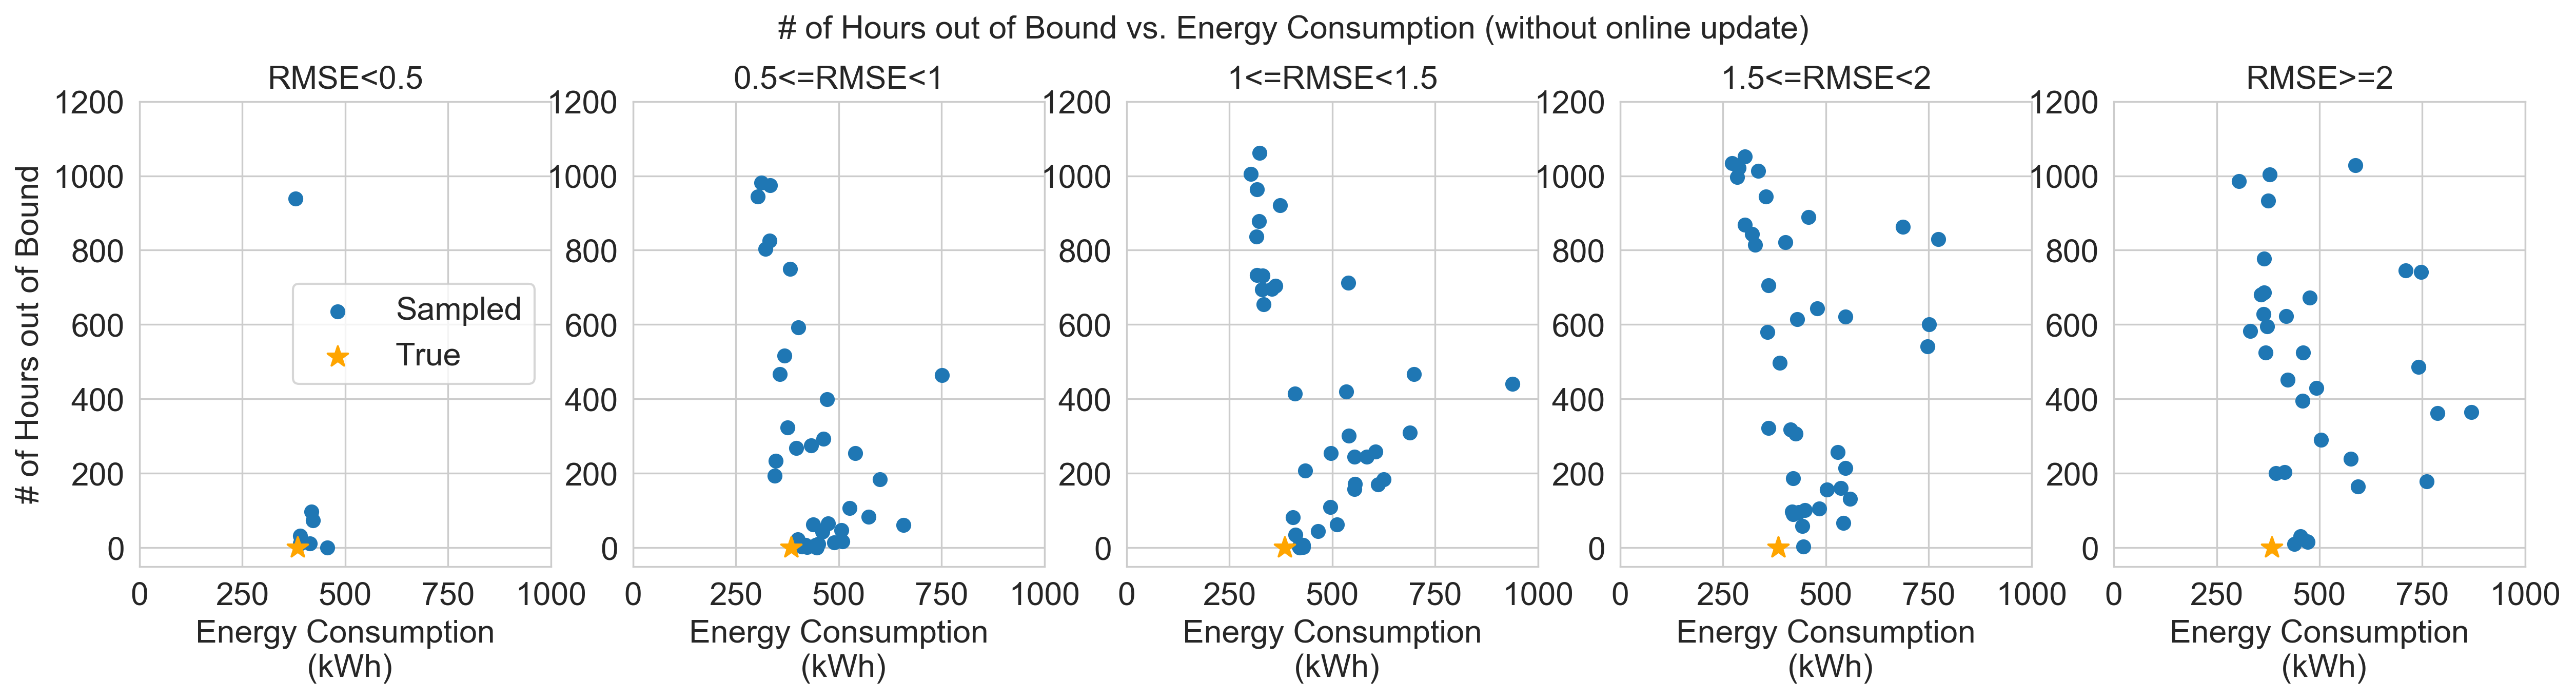

In [11]:
# Plot Energy Use vs # of Hours out of Bounds

sns.set_style("whitegrid")
font = 15
matplotlib.rc('xtick', labelsize = font) 
matplotlib.rc('ytick', labelsize = font)
    
fig, axs = plt.subplots(1, 5, figsize=(20, 4), dpi = 300)
axs[0].scatter(Energy_1, Penalty_1, label = 'Sampled')
axs[0].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[1].scatter(Energy_2, Penalty_2, label = 'Sampled')
axs[1].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[2].scatter(Energy_3, Penalty_3, label = 'Sampled')
axs[2].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[3].scatter(Energy_4, Penalty_4, label = 'Sampled')
axs[3].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[4].scatter(Energy_5, Penalty_5, label = 'Sampled')
axs[4].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
    
axs[0].set_ylim([-50, 1200])
axs[1].set_ylim([-50, 1200])    
axs[2].set_ylim([-50, 1200])
axs[3].set_ylim([-50, 1200])
axs[4].set_ylim([-50, 1200]) 

axs[0].set_xlim([0, 1000])
axs[1].set_xlim([0, 1000])    
axs[2].set_xlim([0, 1000])
axs[3].set_xlim([0, 1000])
axs[4].set_xlim([0, 1000]) 

axs[0].set_ylabel("# of Hours out of Bound", fontsize = font)
#axs[1].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[2].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[3].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[4].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
    
axs[0].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[1].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[2].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[3].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[4].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)

axs[0].set_title("RMSE<0.5", fontsize = font)
axs[1].set_title("0.5<=RMSE<1", fontsize = font)
axs[2].set_title("1<=RMSE<1.5", fontsize = font)
axs[3].set_title("1.5<=RMSE<2", fontsize = font)
axs[4].set_title("RMSE>=2", fontsize = font)

axs[0].legend(loc = 'best', fontsize = font)
    
fig.suptitle("# of Hours out of Bound vs. Energy Consumption (without online update)", fontsize = font , y = 1.02)

Text(0.5, 1.02, '# of Hours out of Bound vs. Energy Consumption (3-month online update)')

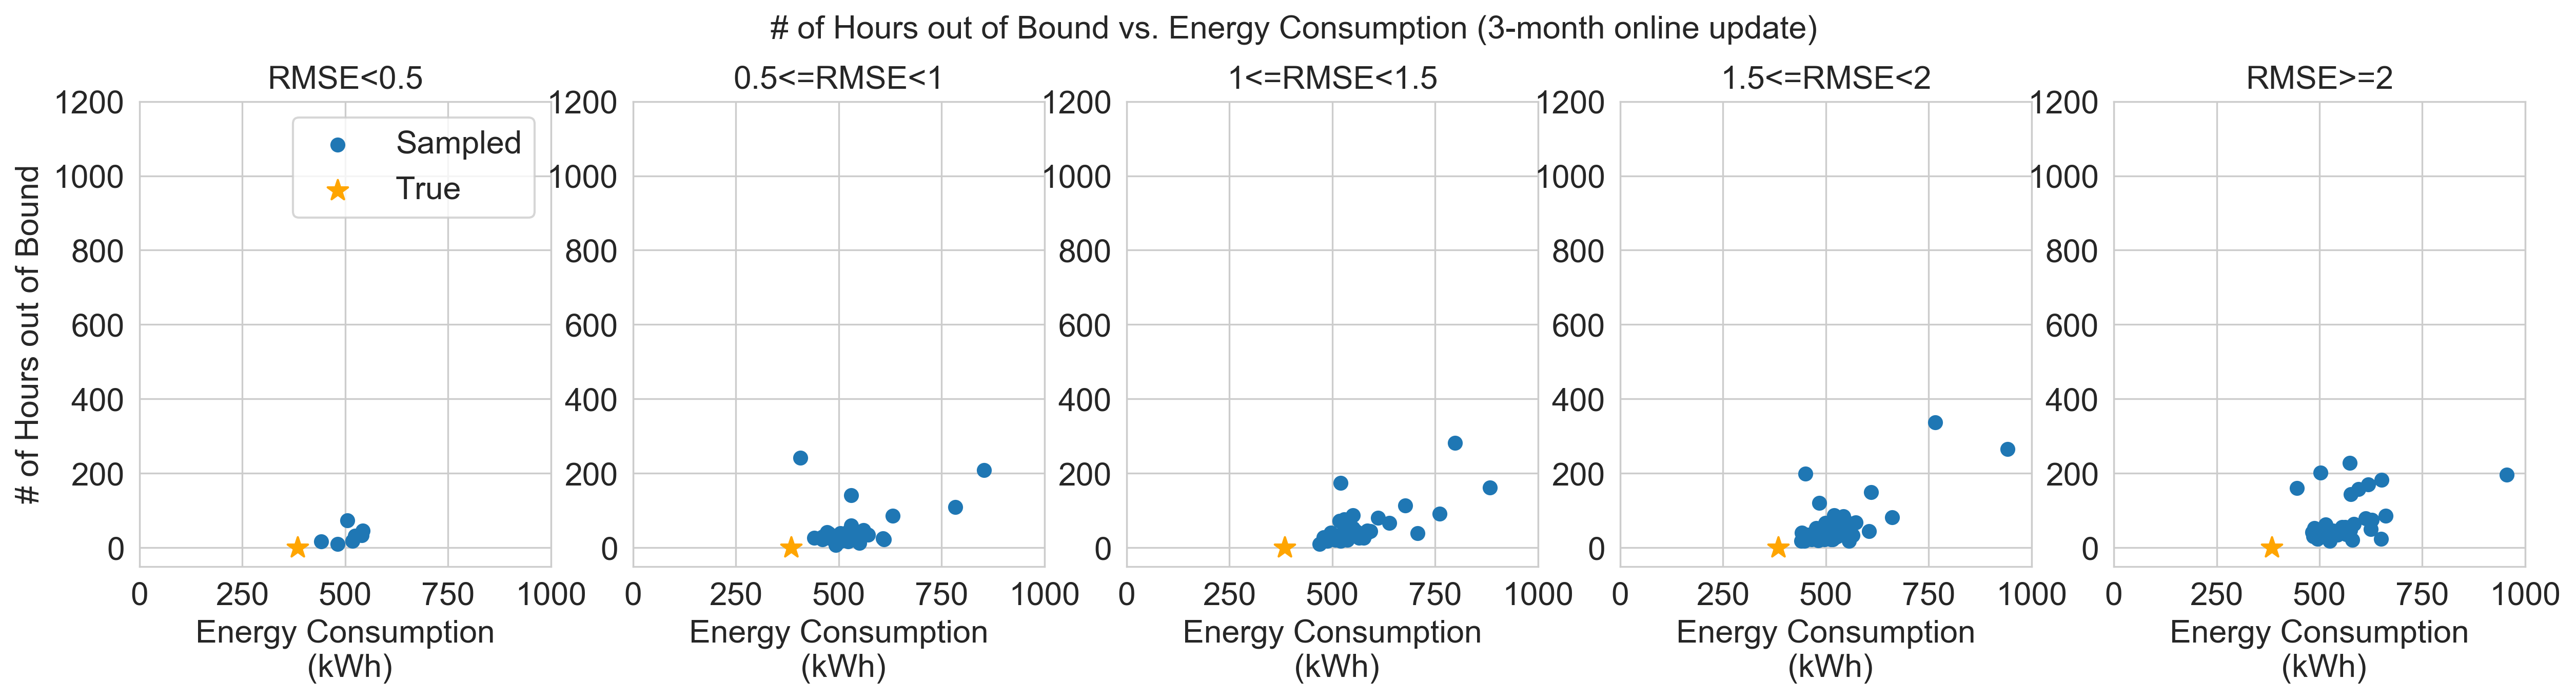

In [12]:
# Plot Energy Use vs # of Hours out of Bounds

sns.set_style("whitegrid")
font = 15
matplotlib.rc('xtick', labelsize = font) 
matplotlib.rc('ytick', labelsize = font)
    
fig, axs = plt.subplots(1, 5, figsize=(20, 4), dpi = 300)
axs[0].scatter(Energy_1_online, Penalty_1_online, label = 'Sampled')
axs[0].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[1].scatter(Energy_2_online, Penalty_2_online, label = 'Sampled')
axs[1].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[2].scatter(Energy_3_online, Penalty_3_online, label = 'Sampled')
axs[2].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[3].scatter(Energy_4_online, Penalty_4_online, label = 'Sampled')
axs[3].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
axs[4].scatter(Energy_5_online, Penalty_5_online, label = 'Sampled')
axs[4].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'True')
    
axs[0].set_ylim([-50, 1200])
axs[1].set_ylim([-50, 1200])    
axs[2].set_ylim([-50, 1200])
axs[3].set_ylim([-50, 1200])
axs[4].set_ylim([-50, 1200]) 

axs[0].set_xlim([0, 1000])
axs[1].set_xlim([0, 1000])    
axs[2].set_xlim([0, 1000])
axs[3].set_xlim([0, 1000])
axs[4].set_xlim([0, 1000]) 

axs[0].set_ylabel("# of Hours out of Bound", fontsize = font)
#axs[1].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[2].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[3].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[4].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
    
axs[0].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[1].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[2].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[3].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[4].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)

axs[0].set_title("RMSE<0.5", fontsize = font)
axs[1].set_title("0.5<=RMSE<1", fontsize = font)
axs[2].set_title("1<=RMSE<1.5", fontsize = font)
axs[3].set_title("1.5<=RMSE<2", fontsize = font)
axs[4].set_title("RMSE>=2", fontsize = font)

axs[0].legend(loc = 'best', fontsize = font)
    
fig.suptitle("# of Hours out of Bound vs. Energy Consumption (3-month online update)", fontsize = font , y = 1.02)

Text(0.5, 1.02, 'Temperature Exceedance vs. Energy Consumption (3-month online update)')

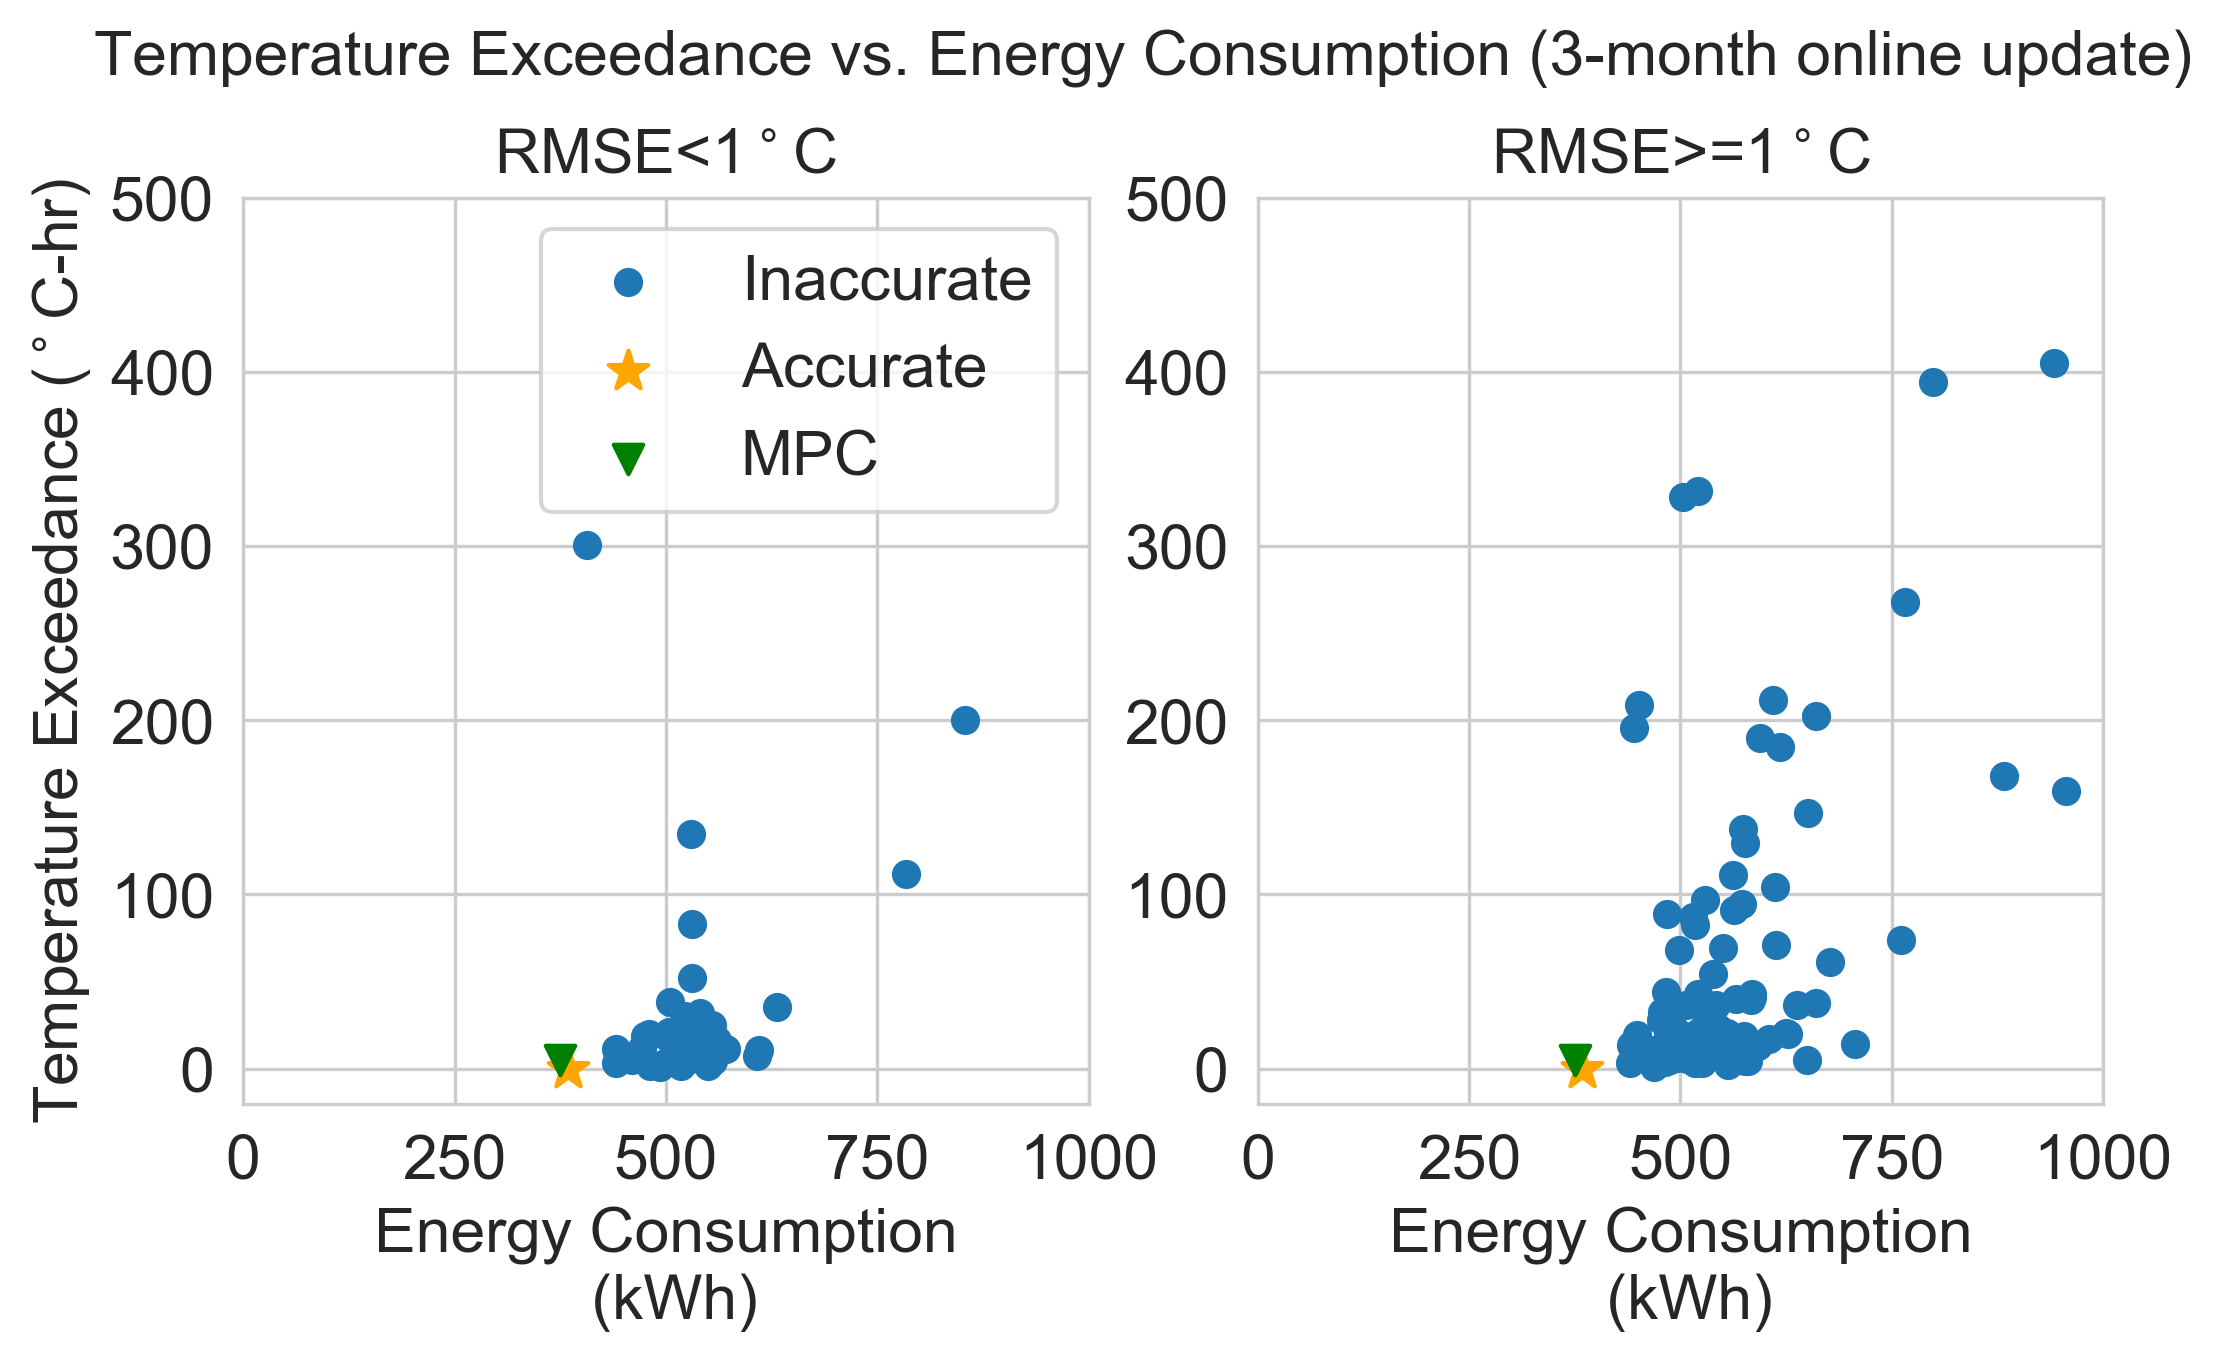

In [25]:
# Plot Energy Use vs Temperature Exceedance

sns.set_style("whitegrid")
font = 15
matplotlib.rc('xtick', labelsize = font) 
matplotlib.rc('ytick', labelsize = font)
    
fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi = 300)
axs[0].scatter(Energy_6_online, Exceedance_6_online, label = 'Inaccurate')
axs[0].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'Accurate')
axs[0].scatter(375, 5, s = 50, color = 'green', marker = 'v', label = 'MPC')
axs[1].scatter(Energy_7_online, Exceedance_7_online, label = 'Inaccurate')
axs[1].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'Accurate')
axs[1].scatter(375, 5, s = 50, color = 'green', marker = 'v', label = 'MPC')
    
axs[0].set_ylim([-20, 500])
axs[1].set_ylim([-20, 500])    

axs[0].set_xlim([0, 1000])
axs[1].set_xlim([0, 1000])    

axs[0].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[1].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[2].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[3].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[4].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
    
axs[0].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[1].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)

axs[0].set_title("RMSE<1$^\circ$C", fontsize = font)
axs[1].set_title("RMSE>=1$^\circ$C", fontsize = font)

axs[0].legend(loc = 'best', fontsize = font)

fig.suptitle("Temperature Exceedance vs. Energy Consumption (3-month online update)", fontsize = font , y = 1.02)

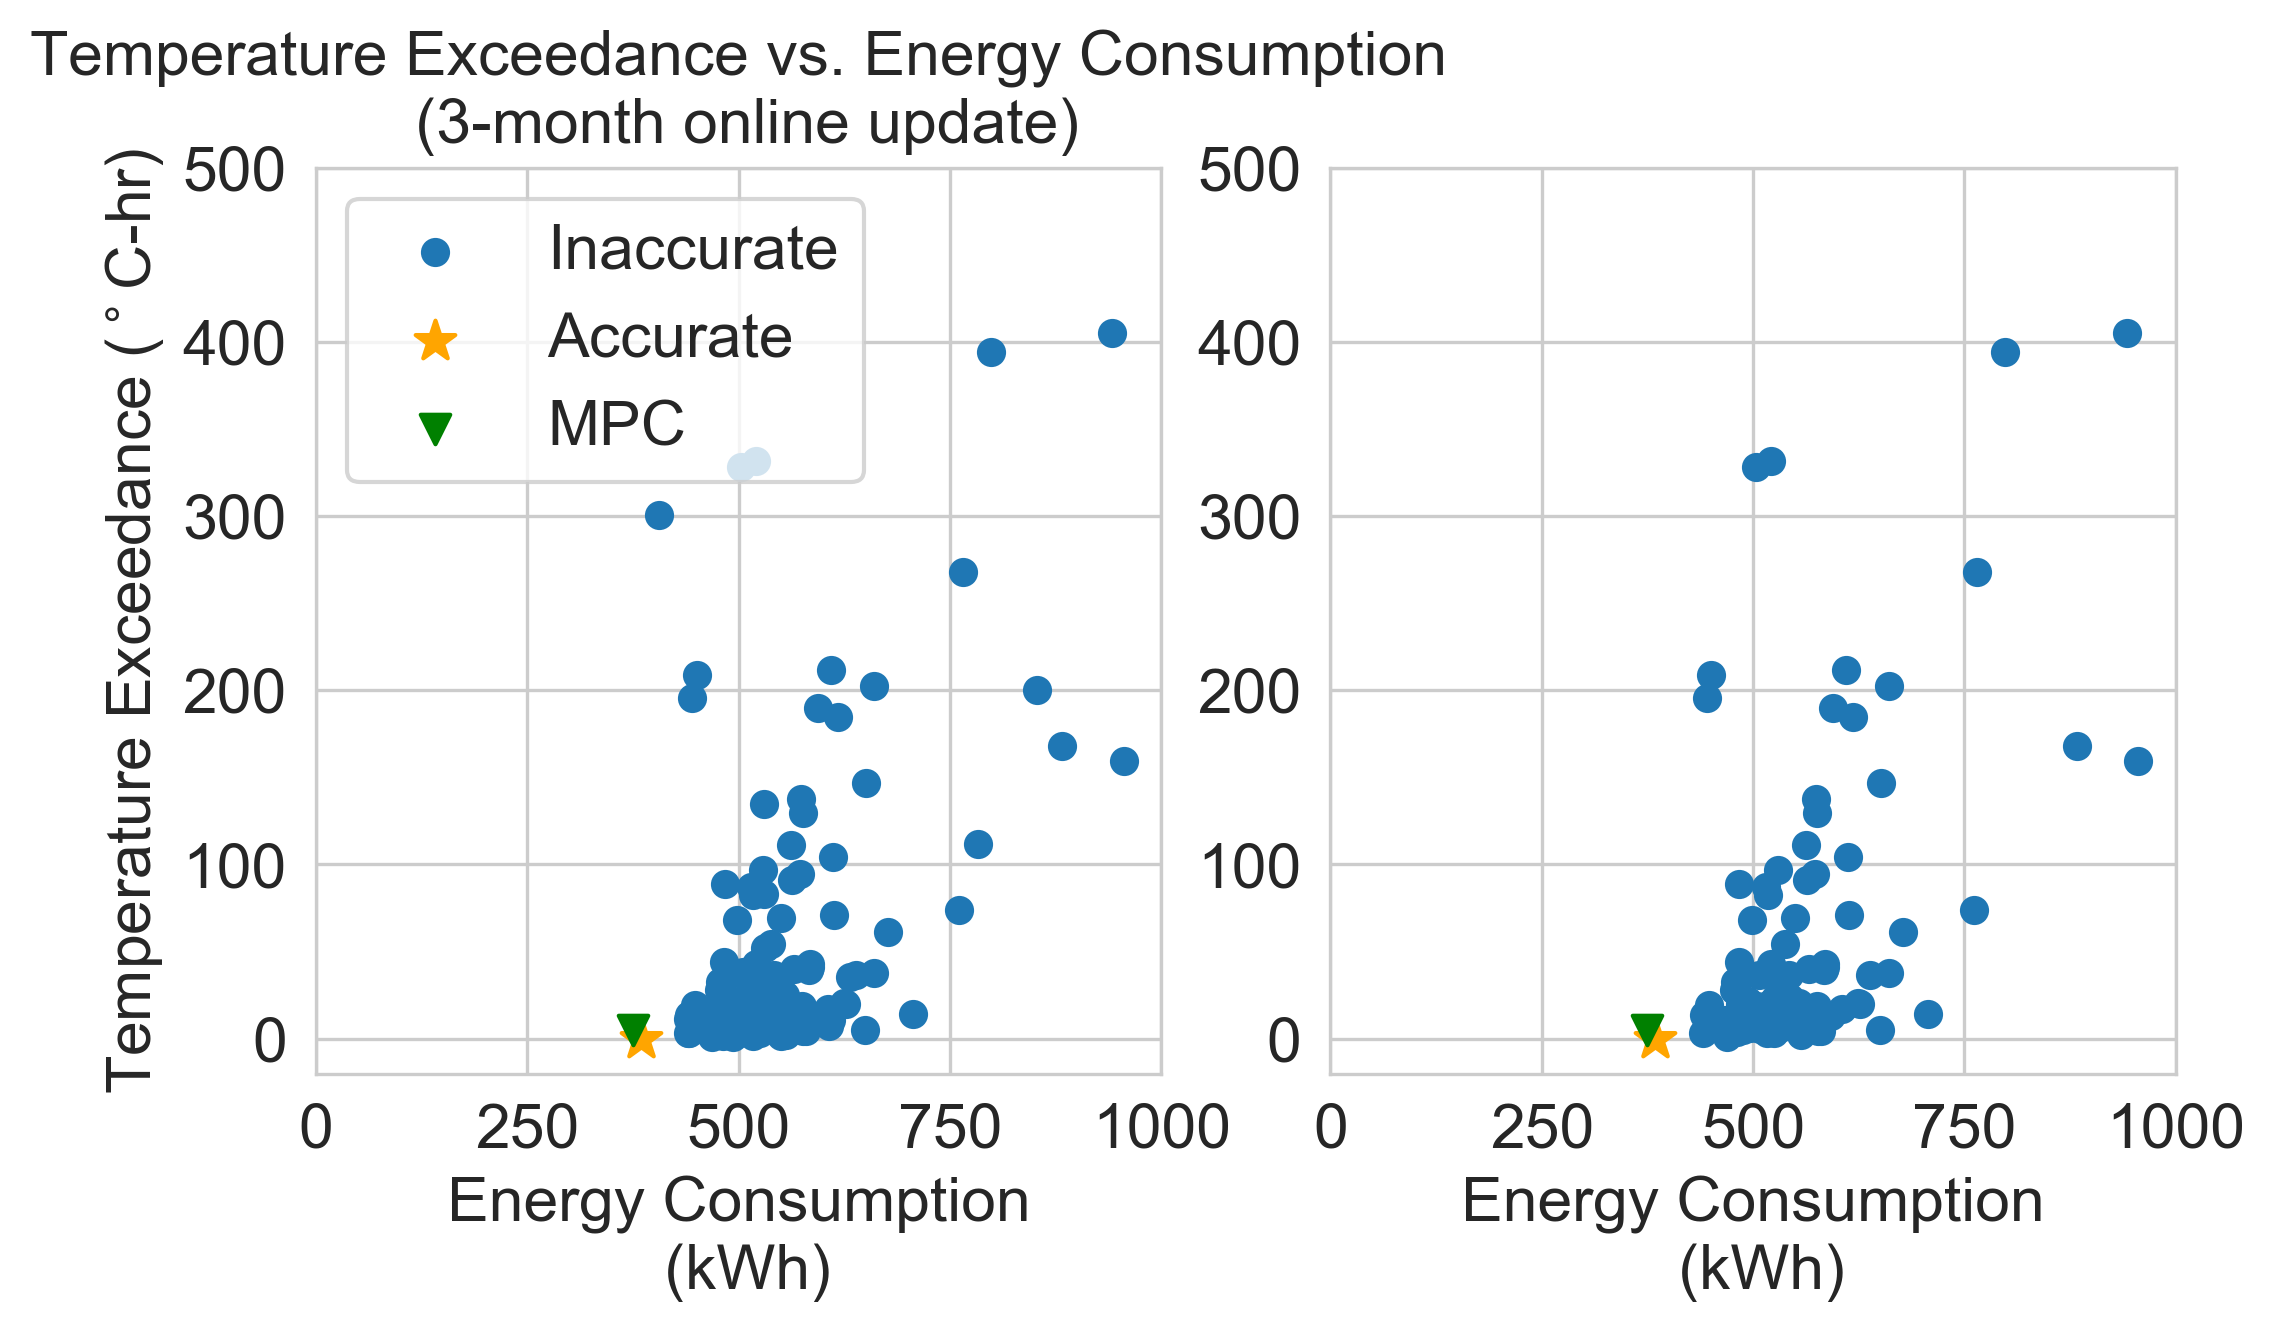

In [31]:
# Plot Energy Use vs Temperature Exceedance

sns.set_style("whitegrid")
font = 15
matplotlib.rc('xtick', labelsize = font) 
matplotlib.rc('ytick', labelsize = font)
    
fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi = 300)
axs[0].scatter(param['Energy_online'], param['Exceedance_online'], label = 'Inaccurate')
axs[0].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'Accurate')
axs[0].scatter(375, 5, s = 50, color = 'green', marker = 'v', label = 'MPC')
axs[1].scatter(Energy_7_online, Exceedance_7_online, label = 'Inaccurate')
axs[1].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'Accurate')
axs[1].scatter(375, 5, s = 50, color = 'green', marker = 'v', label = 'MPC')
    
axs[0].set_ylim([-20, 500])
axs[1].set_ylim([-20, 500])    

axs[0].set_xlim([0, 1000])
axs[1].set_xlim([0, 1000])    

axs[0].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[1].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[2].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[3].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[4].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
    
axs[0].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[1].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)

axs[0].set_title("Temperature Exceedance vs. Energy Consumption\n (3-month online update)", fontsize = font)
#axs[1].set_title("RMSE>=1$^\circ$C", fontsize = font)

axs[0].legend(loc = 'best', fontsize = font)

#fig.suptitle("Temperature Exceedance vs. Energy Consumption (3-month online update)", fontsize = font , y = 1.02)

Text(0.5, 1.02, 'Temperature Exceedance vs. Energy Consumption (3-month online update)')

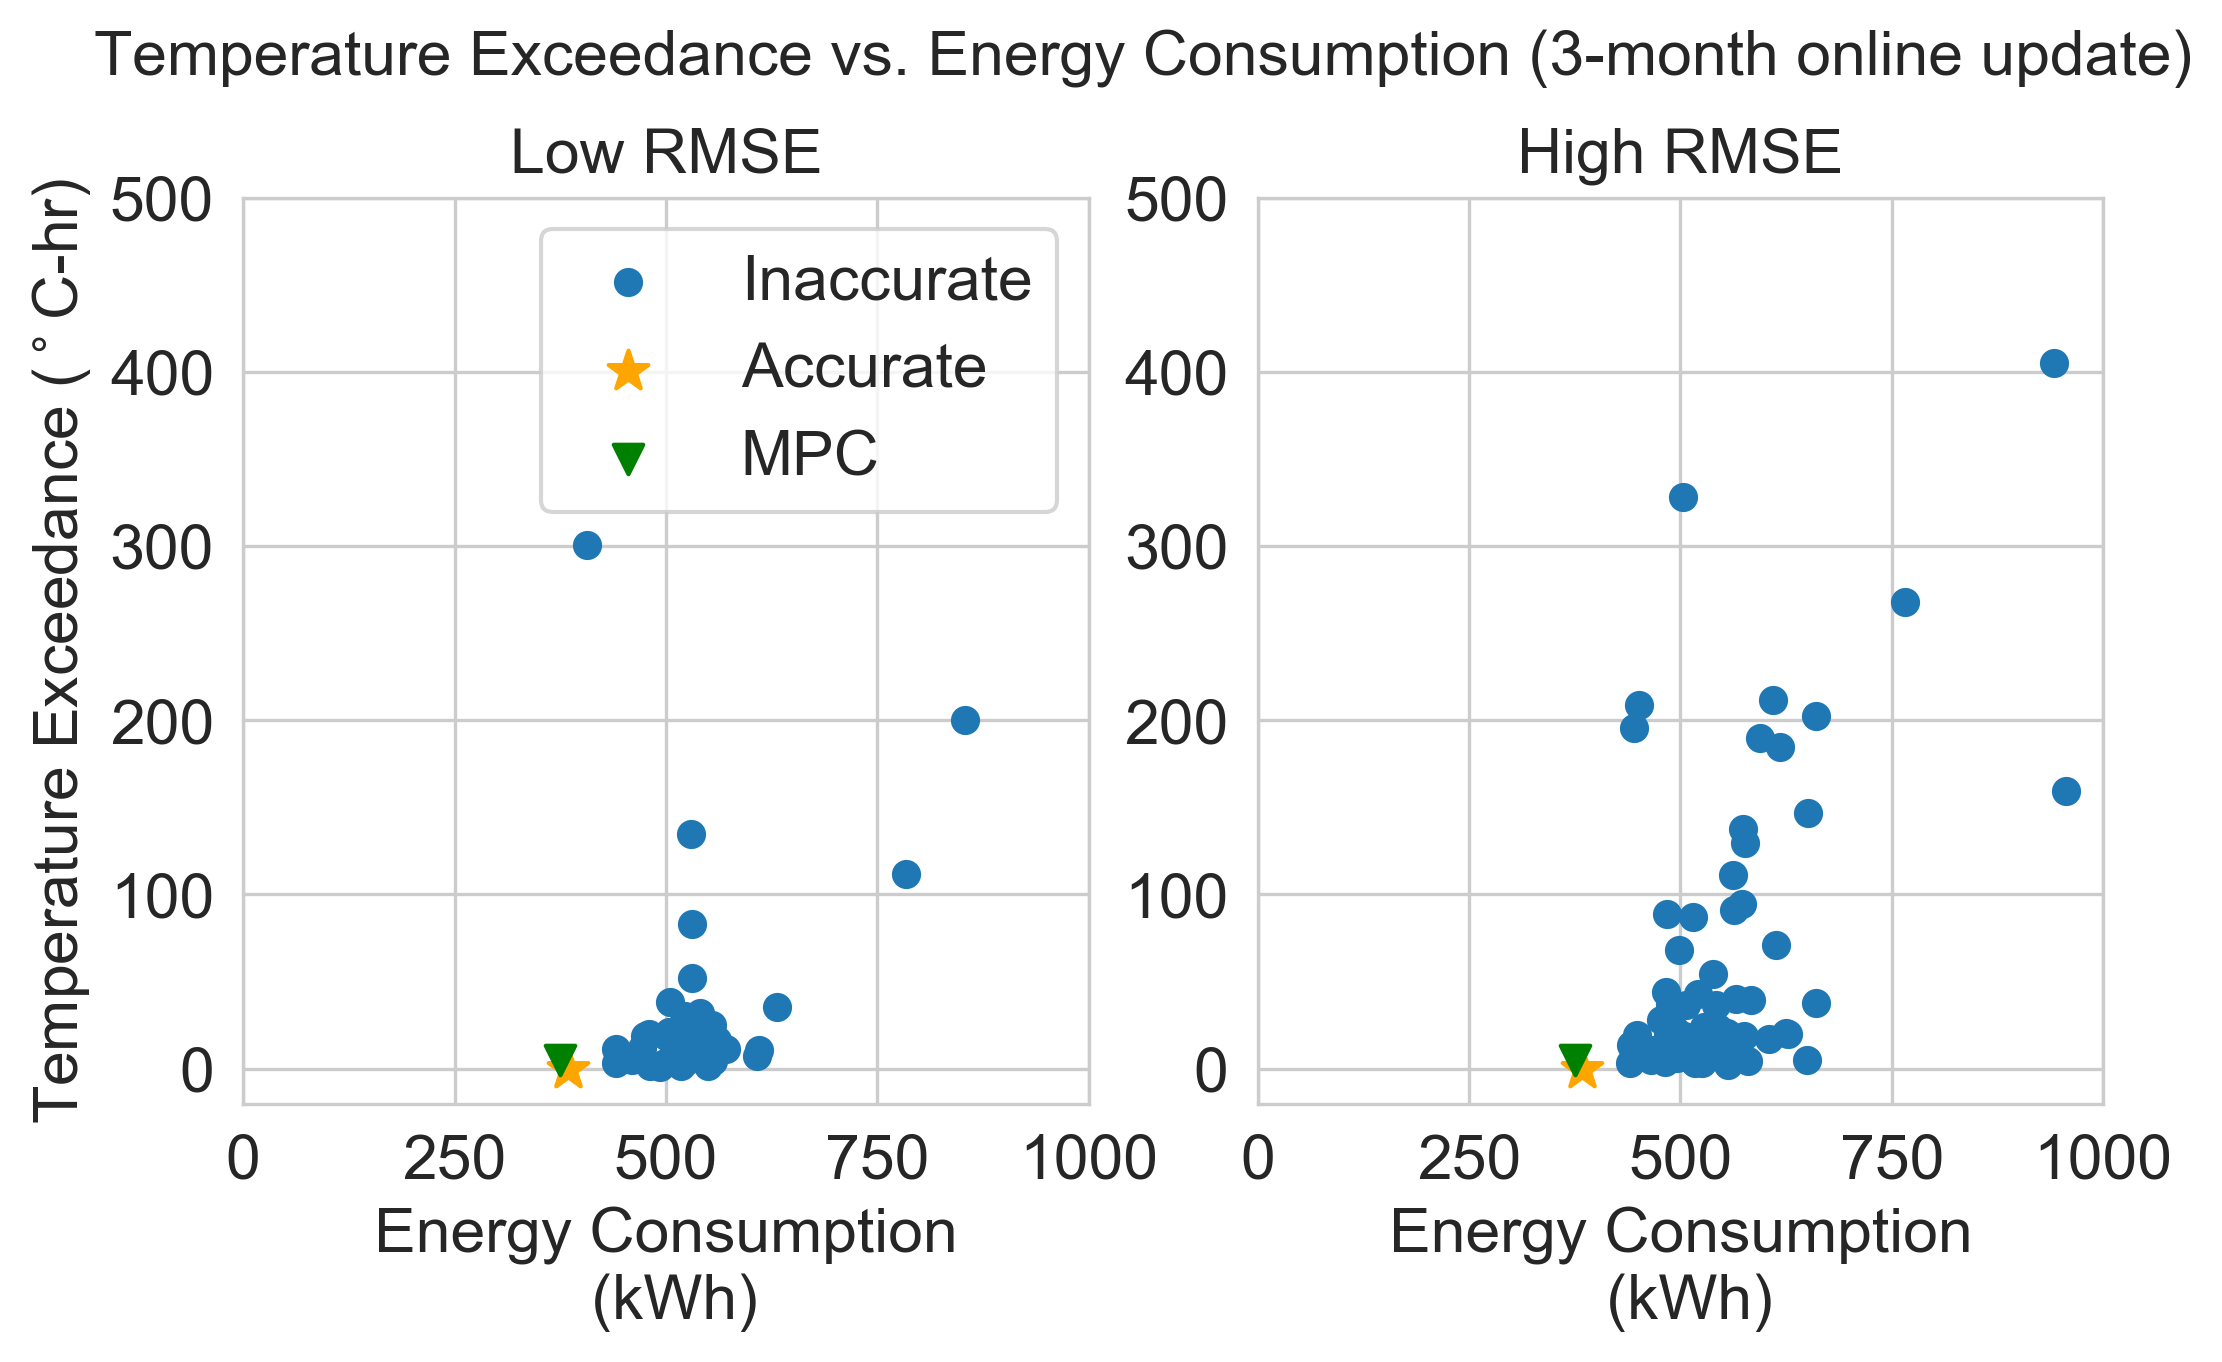

In [34]:
# Plot Energy Use vs Temperature Exceedance

sns.set_style("whitegrid")
font = 15
matplotlib.rc('xtick', labelsize = font) 
matplotlib.rc('ytick', labelsize = font)
    
fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi = 300)
axs[0].scatter(Energy_6_online, Exceedance_6_online, label = 'Inaccurate')
axs[0].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'Accurate')
axs[0].scatter(375, 5, s = 50, color = 'green', marker = 'v', label = 'MPC')
axs[1].scatter(Energy_8_online, Exceedance_8_online, label = 'Inaccurate')
axs[1].scatter(384, 0, s = 100, color = 'orange', marker = '*', label = 'Accurate')
axs[1].scatter(375, 5, s = 50, color = 'green', marker = 'v', label = 'MPC')
    
axs[0].set_ylim([-20, 500])
axs[1].set_ylim([-20, 500])    

axs[0].set_xlim([0, 1000])
axs[1].set_xlim([0, 1000])    

axs[0].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[1].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[2].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[3].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
#axs[4].set_ylabel("Temperature Exceedance ($^\circ$C-hr)", fontsize = font)
    
axs[0].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)
axs[1].set_xlabel("Energy Consumption\n (kWh)", fontsize = font)

axs[0].set_title("Low RMSE", fontsize = font)
axs[1].set_title("High RMSE", fontsize = font)

axs[0].legend(loc = 'best', fontsize = font)

fig.suptitle("Temperature Exceedance vs. Energy Consumption (3-month online update)", fontsize = font , y = 1.02)